# <font color ="#CE4A06">Correlation Coefficient</font>

A measure of the linear correlation between two variables.  
A coefficient has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

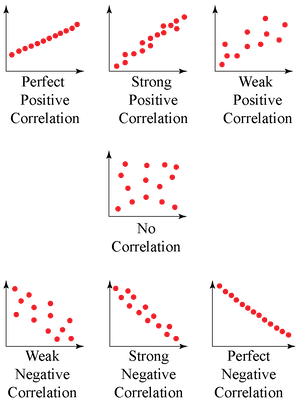

image source: https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/diksha-q-how-to-calculate-correlation-coefficient-01-1609233340.png

&nbsp;    
#### <font color ="439303">*Pearson Correlation Coefficient*</font>

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation <u>requires that each dataset be normally distributed</u>.

\
Formula:

![PearsonCorr](https://www.gstatic.com/education/formulas2/397133473/en/correlation_coefficient_formula.svg)


$r$	=	correlation coefficient  
$x_{i}$	=	values of the x-variable in a sample  
$\bar{x}$	=	mean of the values of the x-variable  
$y_{i}$	=	values of the y-variable in a sample  
$\bar{y}$	=	mean of the values of the y-variable  


&nbsp;  
#### <font color ="439303">*The 'auto-mpg' Dataset*</font>

In this lesson, we will use the 'auto-mpg' dataset, which was taken from the StatLib library maintained at Carnegie Mellon University. This dataset was used in the 1983 American Statistical Association Exposition and contains **398** automobile records from 1970 to 1982.

***Attribute Information:***  
1. mpg<sup>*</sup>:           miles per gallon
2. cylinders:     Number of cylinders between 4 and 8
3. displacement:  Engine displacement (cu. inches)
4. horsepower:    Engine horsepower
5. weight:        Vehicle weight (lbs.)
6. acceleration:  Time to accelerate from 0 to 60 mph (sec.)
7. model year:    Model year (modulo 100)
8. origin:        Origin of car (1. American, 2. European, 3. Japanese)
9. model:      car model name  

<sup>*</sup>Target / outcome variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

&NewLine;  
#### <font color ="blue">**Read Dataset**</font>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
0,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
1,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
2,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
3,11.0,8,400.0,150.0,4997,14.0,73,1,chevrolet impala
4,11.0,8,350.0,180.0,3664,11.0,73,1,oldsmobile omega


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   model         398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


&NewLine;  
#### <font color ="blue">**Data Overview**</font>

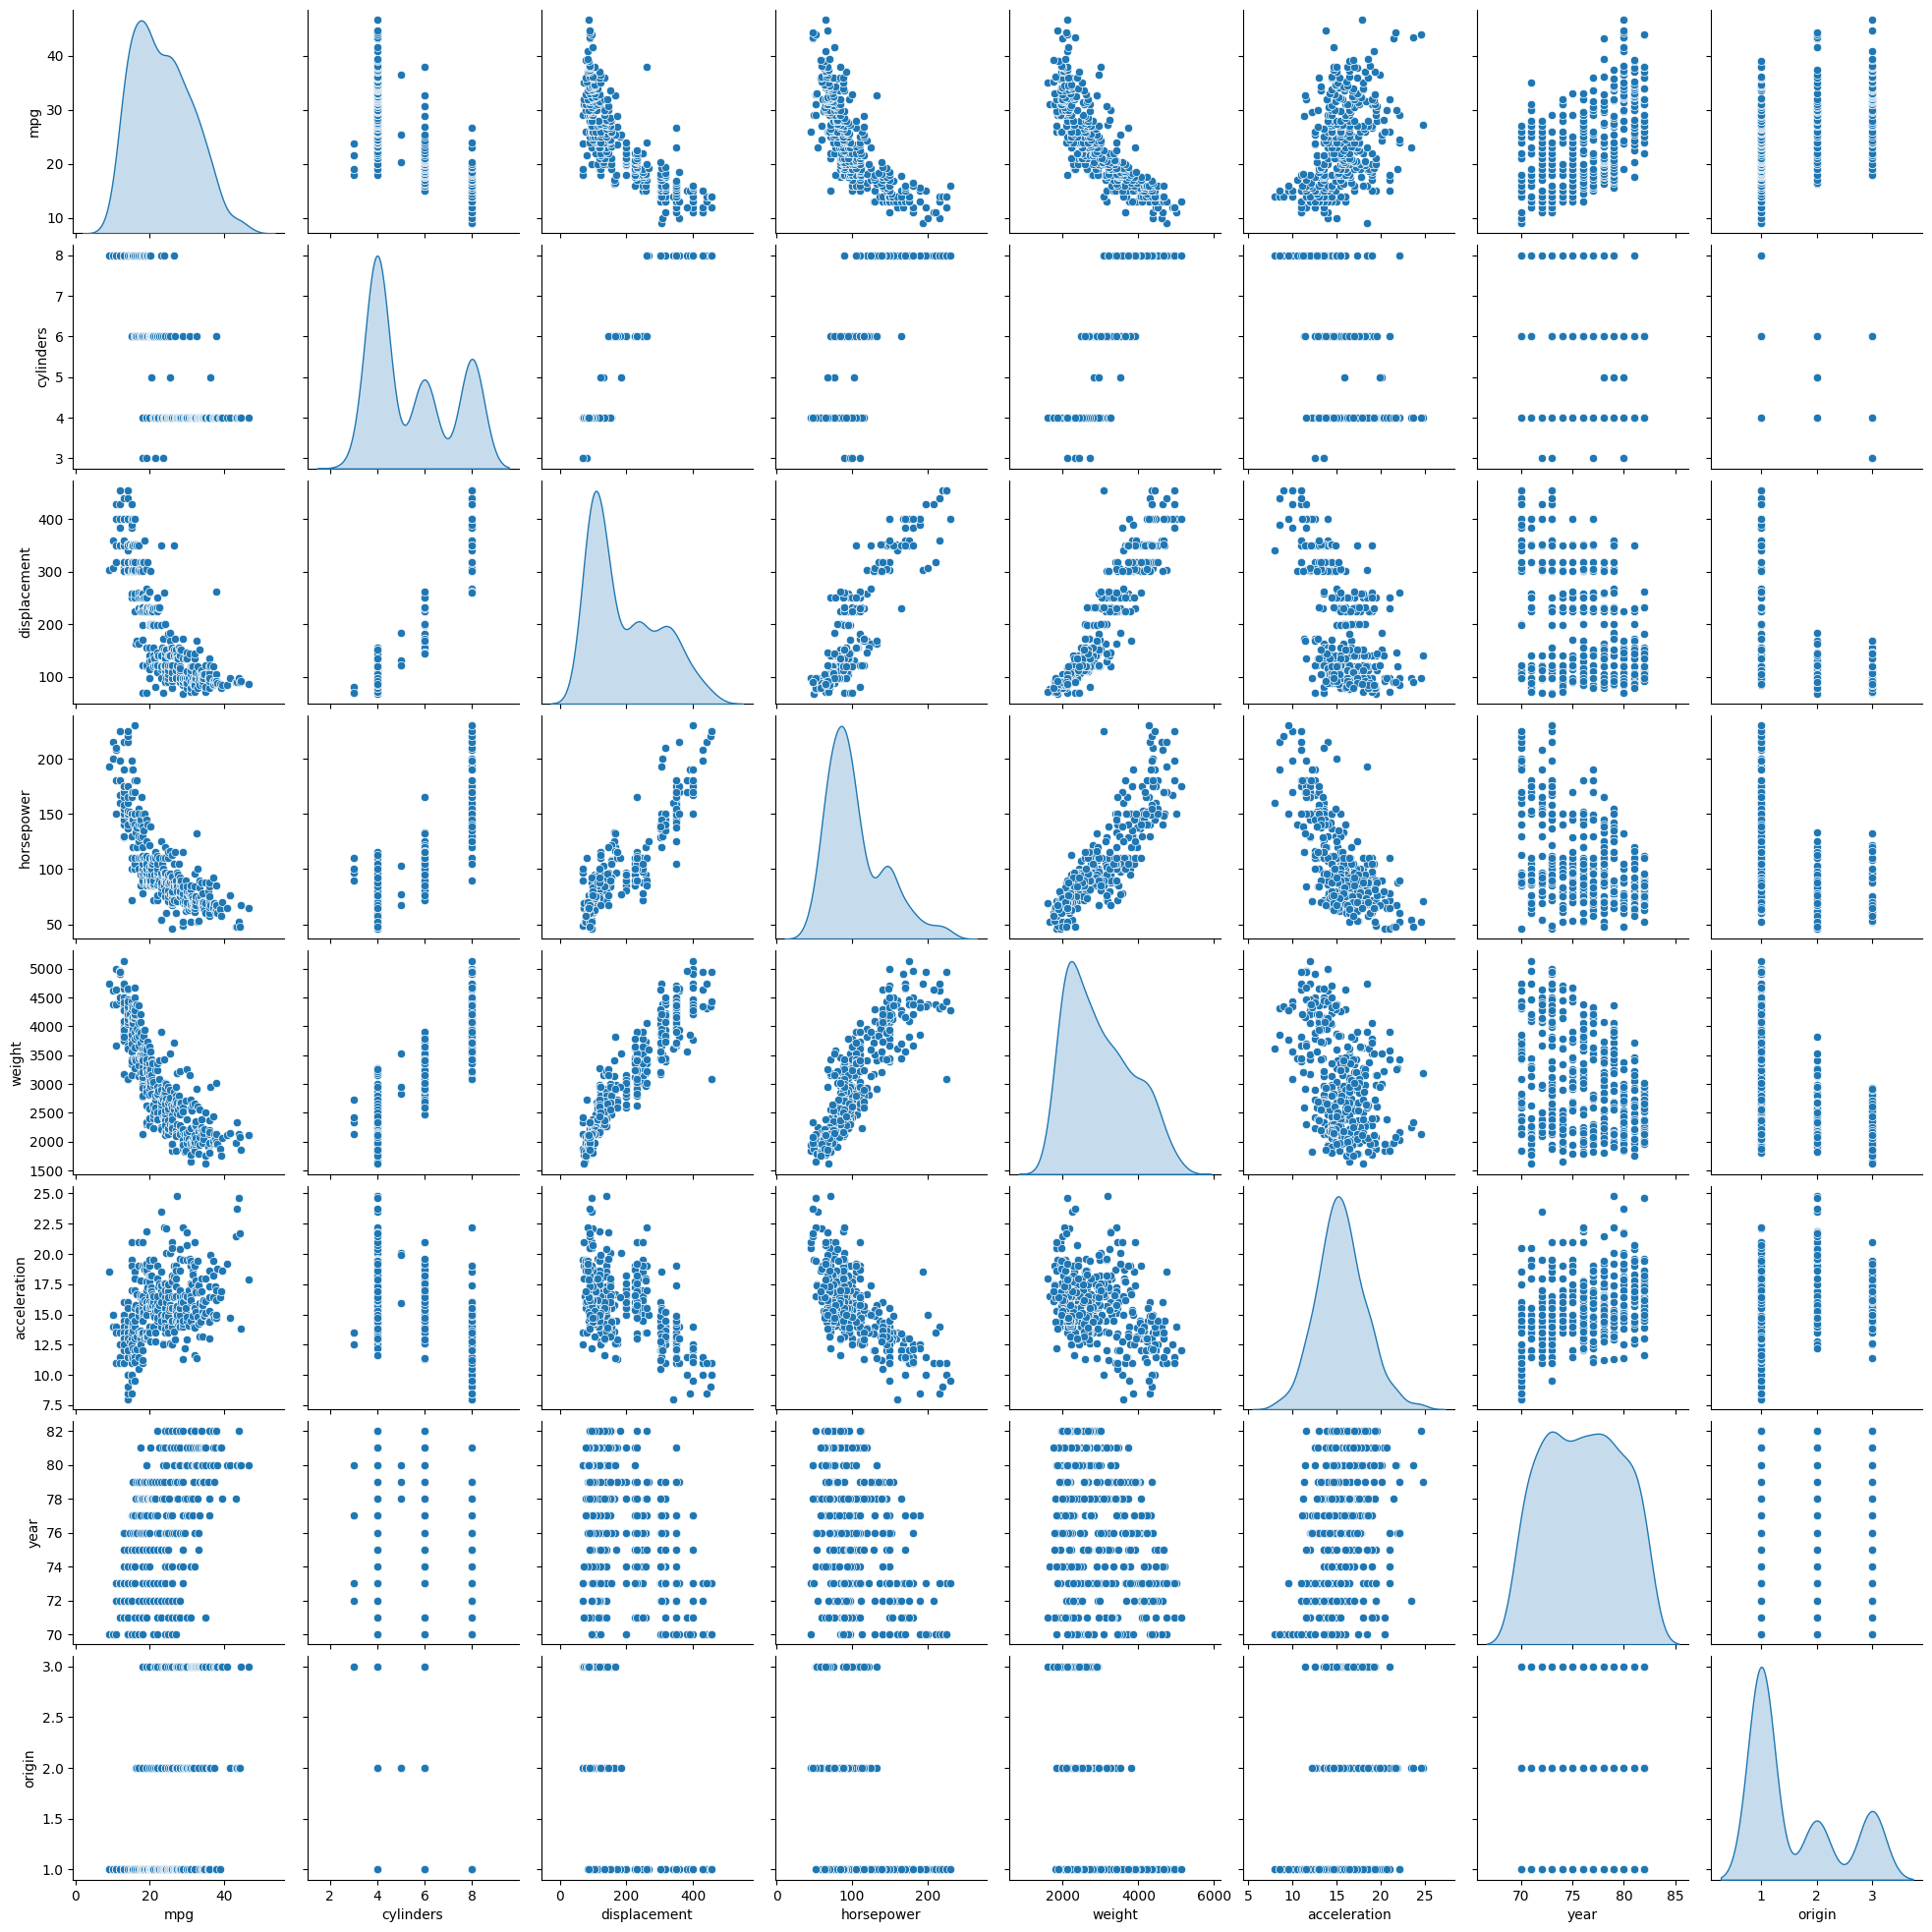

In [4]:
sns.pairplot(data=df.dropna(),
             diag_kind="kde")

&NewLine;  
#### <font color ="blue">**Calculates a Pearson Correlation Coefficient and the P-Value for Testing Non-Correlation**</font>

If we ***assume*** that all data are normally distributed, we can calculate the Pearson correlation coefficient and the p-value for testing non-correlation using pearsonr().

The p-value roughly represents the probability of an uncorrelated system producing datasets with a Pearson correlation at least as extreme as the one computed from these datasets. While p-values are not entirely reliable, they are generally reasonable for datasets larger than approximately 500.

&nbsp;   
For displacement:

In [5]:
stats.pearsonr(x=df.mpg,
               y=df.displacement)

PearsonRResult(statistic=np.float64(-0.804202824805898), pvalue=np.float64(1.655888910192971e-91))

&nbsp;   
For all columns except 'model':

In [6]:
coeffs = {}
coeffs['var'] = df.columns[:-1] # exclude column 'model'
coeffs['coeff'] = []
coeffs['p-value'] = []
for c in df.columns[:-1]:
    if(df[c].isnull().any()):
        coeff, p = stats.pearsonr(x=df.dropna().mpg, y=df.dropna()[c])
    else:
        coeff, p = stats.pearsonr(x=df.mpg, y=df[c])
    coeffs['coeff'].append(coeff)
    coeffs['p-value'].append(p)

coeffs = pd.DataFrame(coeffs)
coeffs.sort_values(by='coeff', ascending=False)

,var,coeff,p-value
0,mpg,1.000000,0.000000e+00
6,year,0.579267,4.844936e-37
7,origin,0.563450,1.011482e-34
5,acceleration,0.420289,1.823092e-18
1,cylinders,-0.775396,4.503992e-81
3,horsepower,-0.778427,7.031989e-81
2,displacement,-0.804203,1.655889e-91
4,weight,-0.831741,2.972800e-103


&nbsp;   
We can see that 'weight' has highest absolute correlation coefficient with 'mpg'. So, let's see the scatter plot between these two variables.

<Axes: xlabel='weight', ylabel='mpg'>

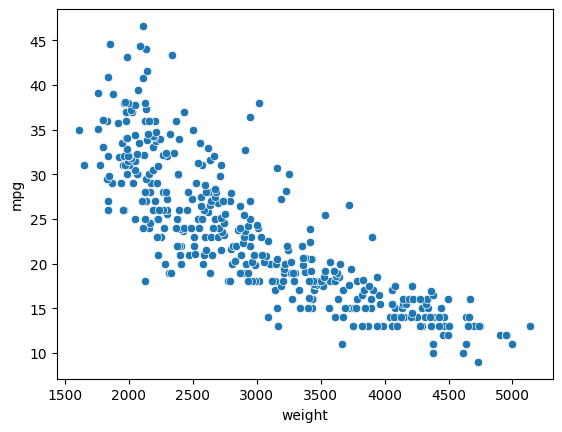

In [7]:
sns.scatterplot(data=df,
                x='weight',
                y='mpg')

&nbsp;   
In case of 'acceleration':

<Axes: xlabel='acceleration', ylabel='mpg'>

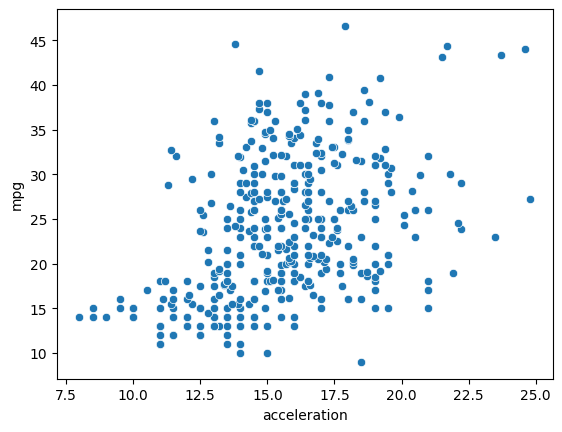

In [8]:
sns.scatterplot(data=df,
                x='acceleration',
                y='mpg')

&nbsp;   
<font color ="darkred">***Alternatively, we can use method corr() provided by Pandas***:</font>

In [9]:
corr = df.corr(method='pearson', numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


<Axes: >

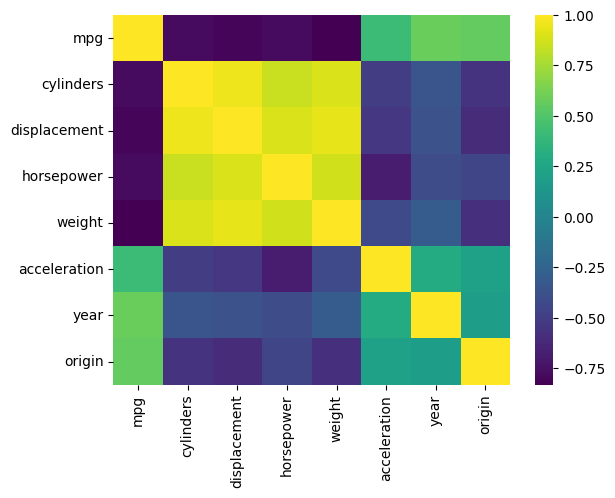

In [10]:
sns.heatmap(corr, cmap='viridis')

However, p-values are not generated by corr().

&nbsp;    
#### <font color ="blue">**Check Normality**</font>

Since Pearson’s correlation requires that each dataset be normally distributed, we first need to check normality for each feature.

In [11]:
for c in df.columns[:-1]: # exclude column 'model'
    print(c+':')
    print(stats.shapiro(df.dropna()[c]))
    print('')

mpg:
ShapiroResult(statistic=np.float64(0.9671696219783011), pvalue=np.float64(1.049440706338603e-07))

cylinders:
ShapiroResult(statistic=np.float64(0.7506596822226748), pvalue=np.float64(6.880241744029972e-24))

displacement:
ShapiroResult(statistic=np.float64(0.8818359417766877), pvalue=np.float64(8.983637114582913e-17))

horsepower:
ShapiroResult(statistic=np.float64(0.9040974881446456), pvalue=np.float64(5.0220692907909105e-15))

weight:
ShapiroResult(statistic=np.float64(0.9414660744821142), pvalue=np.float64(2.6016858076512465e-11))

acceleration:
ShapiroResult(statistic=np.float64(0.9918671364554664), pvalue=np.float64(0.030528862000202484))

year:
ShapiroResult(statistic=np.float64(0.9469665948027586), pvalue=np.float64(1.2226170042045836e-10))

origin:
ShapiroResult(statistic=np.float64(0.6737641638584284), pvalue=np.float64(8.802044229203731e-27))



&nbsp;   
All p-values are <= 0.05.  
This means all variables are not normally distributed.

&nbsp;     
#### <font color ="#439303">*Spearman Correlation Coefficient*</font>

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonic relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation ***does not assume that the datasets are normally distributed***.

Like other correlation coefficients, it ranges from -1 to +1, with 0 indicating no correlation. A correlation of -1 or +1 signifies a perfect monotonic relationship. A positive correlation means that as x increases, y also increases, while a negative correlation means that as x increases, y decreases.

Formula:

![spearman](https://www.gstatic.com/education/formulas2/397133473/en/spearman_s_rank_correlation_coefficient.svg)


$\rho$	=	Spearman's rank correlation coefficient  
$d_{i}$	=	difference between the two ranks of each observation  
$n$	=	number of observations  

&nbsp;    
#### <font color ="blue">**Calculate a Spearman Correlation Coefficient with Associated P-Value**</font>

Similar to Pearson’s correlation, the p-value roughly represents the probability of an uncorrelated system producing datasets with a Spearman correlation at least as extreme as the one computed from these datasets. While p-values are not entirely reliable, they are generally reasonable for datasets larger than approximately 500.

In [12]:
coeffs, pvals = stats.spearmanr(df.dropna().iloc[:,:-1])

In [13]:
coeffs = pd.DataFrame(coeffs,
                      columns=df.columns[:-1],
                      index=df.columns[:-1])
coeffs

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841,0.580482
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087,-0.610468
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582,-0.709573
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.508989
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981,-0.631371
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306,0.227406
year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000,0.165399
origin,0.580482,-0.610468,-0.709573,-0.508989,-0.631371,0.227406,0.165399,1.000000


<Axes: >

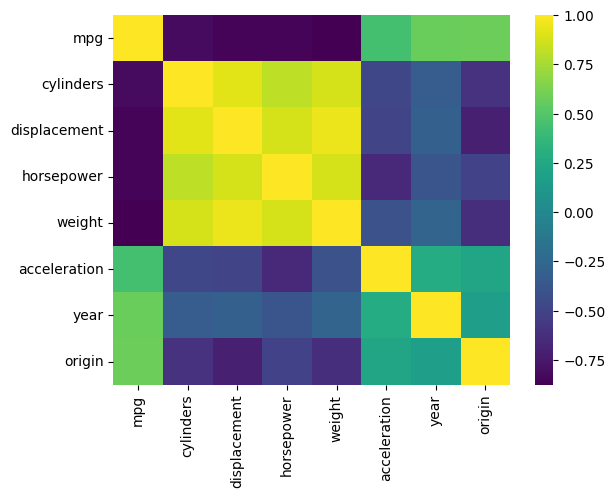

In [14]:
sns.heatmap(coeffs, cmap='viridis')

In [15]:
pd.DataFrame(pvals,
             columns=df.columns[:-1],
             index=df.columns[:-1])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,0.000000e+00,6.649861e-98,2.195778e-113,1.619383e-112,2.662378e-125,3.903604e-20,7.465532e-36,1.097626e-36
cylinders,6.649861e-98,0.000000e+00,1.810859e-154,6.065373e-95,1.509812e-125,1.374921e-23,1.757611e-11,2.139199e-41
displacement,2.195778e-113,1.810859e-154,0.000000e+00,1.126737e-125,2.463170e-192,4.061210e-26,5.625748e-10,2.879842e-61
horsepower,1.619383e-112,6.065373e-95,1.126737e-125,0.000000e+00,2.182674e-127,5.157840e-50,1.190939e-15,3.183740e-27
weight,2.662378e-125,1.509812e-125,2.463170e-192,2.182674e-127,0.000000e+00,6.484246e-17,1.515585e-08,5.457059e-45
acceleration,3.903604e-20,1.374921e-23,4.061210e-26,5.157840e-50,6.484246e-17,0.000000e+00,2.098495e-08,5.422027e-06
year,7.465532e-36,1.757611e-11,5.625748e-10,1.190939e-15,1.515585e-08,2.098495e-08,0.000000e+00,1.012820e-03
origin,1.097626e-36,2.139199e-41,2.879842e-61,3.183740e-27,5.457059e-45,5.422027e-06,1.012820e-03,0.000000e+00


&nbsp;    
<font color ="darkred">***Alternatively, we can use method corr() provided by Pandas***:</font>

In [16]:
corr = df.corr(method='spearman', numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469,0.580694
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012,-0.604550
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257,-0.707197
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.508989
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015,-0.628434
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632,0.220574
year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000,0.166551
origin,0.580694,-0.604550,-0.707197,-0.508989,-0.628434,0.220574,0.166551,1.000000


<Axes: >

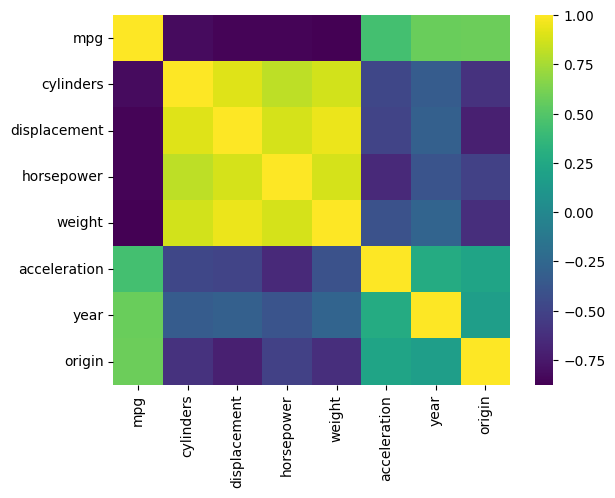

In [17]:
sns.heatmap(corr, cmap='viridis')

&nbsp;    
#### <font color ="439303">*Key Takeaways*</font>

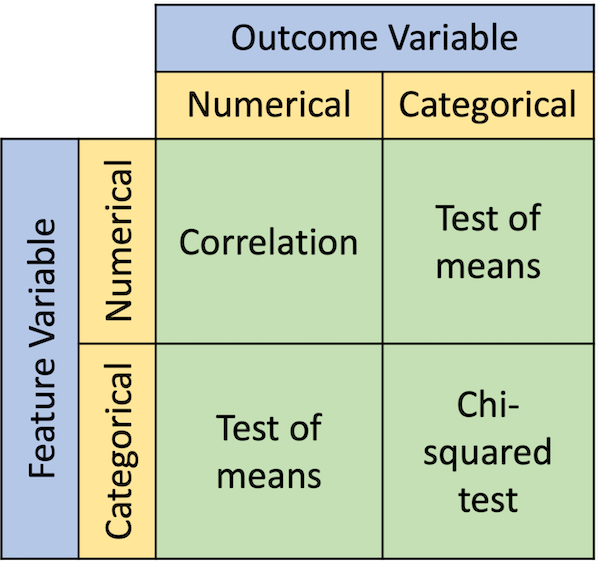